# Nanowire Statistics Demo

Welcome to the nanowire statistics demo. Here you will see how you can detect nanowires in images, and gather useful statistics about your sample. For this tutorial we will limit ourselves to a rather small area, containing a little over 1 300 nanowires.

The class that will be demonstrated uses images provided as a set of tiles. This enables you to work with images of a large area with many thousand nanowires without having to load the entire image into memory at once. 

### Setup:
Before we start working, we need to do some setup: Just run this cell, if it executes fine then opencv should be correctly installed and we can get going.

In [10]:
import matplotlib.pyplot as plt
import warnings
from tileset import Tileset
import detect

warnings.filterwarnings("ignore",".*GUI is implemented.*")
tiles = Tileset('tiles/originals', 4, 3, 1024, 1024, 9.767, detect.tiled)

### Pre-processing
Before we start working with the images, we should do some preprocessing. Run the next cell to see an example of how a nanowire looks in our raw images.

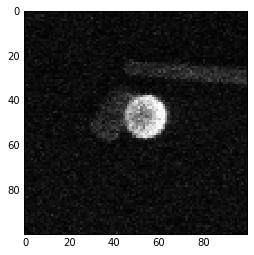

In [11]:
%matplotlib inline
tile = tiles.getTile(0, 0)
plt.imshow(tile[80:180, 100:200], cmap='gray', interpolation='nearest')

Our images have some shot noise, so the edges of the nanowire droplets become fuzzy. The detection works best if the droplets have smooth edges. Let's run some code to smooth out the noise, and also attempt to fill in the dark center of the nanowires. This takes a while, so if you don't want to wait, you could use the code in the next cell instead to just load the provided set of preprocessed images.

In [ ]:
tiles = tiles.prepTiles('tiles/preprocessed', 5, fill=True)

In [12]:
tiles = Tileset('tiles/preprocessed', 4, 3, 1024, 1024, 9.767, detect.tiled)

Let's see how that same nanowire looks after the preprocessing.

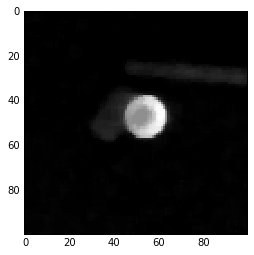

In [13]:
tile = tiles.getTile(0, 0)
plt.imshow(tile[80:180, 100:200], cmap='gray', interpolation='nearest')

Now the edges are smooth, and the center of the droplet not so dark. This will make it easier for the detection algorithm to work accurately. Let's now try to detect nanowire droplets in our dataset.

Blobs found: 106
Detected blobs for tile 0, 0
Blobs found: 114
Detected blobs for tile 0, 1
Blobs found: 119
Detected blobs for tile 0, 2
Blobs found: 112
Detected blobs for tile 1, 0
Blobs found: 119
Detected blobs for tile 1, 1
Blobs found: 105
Detected blobs for tile 1, 2
Blobs found: 111
Detected blobs for tile 2, 0
Blobs found: 107
Detected blobs for tile 2, 1
Blobs found: 108
Detected blobs for tile 2, 2
Blobs found: 111
Detected blobs for tile 3, 0
Blobs found: 108
Detected blobs for tile 3, 1
Blobs found: 107
Detected blobs for tile 3, 2


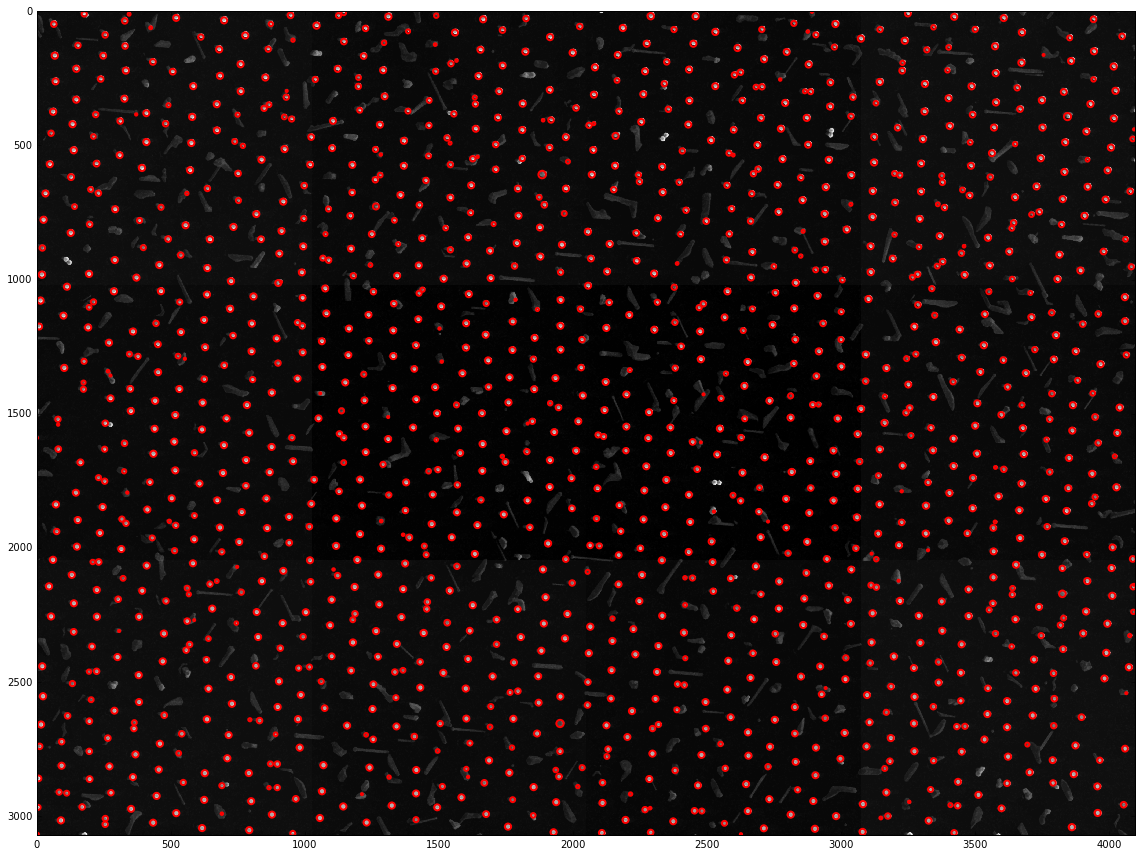

In [14]:
tiles.detectAllBlobs()
tiles.displayTileRegion(0, 3, 0, 2)

If everything went according to plan, you should now see a red circle around each detected nanowire. Now that we have the position of every nanowire, we can for example make a nanowire density plot of our sample.

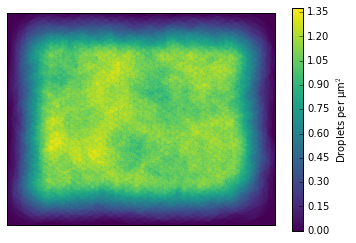

In [15]:
tiles.plotDensity(1, 400)

# Lattice comparison

So we've detected the nanowires, but to characterize growth we must compare with our desired result. This sample was patterned in NIL with a hexagonal hole pattern. In order to judge the success of our growth we define the lattice parameters to create the theoretical patterned lattice. This lattice gives us the reference to quantify deviations from a perfect hexagonal nanowire pattern.

Since the lattice of patterned  holes cannot be seen on the image, we create a lattice that best matches the overall pattern of the detected droplets by minimizing overall deviations. The optimization first guess is provided by the user, allowing for accommodation of different patterns (hexagonal, rectangular, etc.)

#### Lattice fitting guide
When you run the following cell, an interactive plot will be created showing a single tile from the dataset. Look closely and you'll see a small red dot in the nanowire to the top left of the image. This is the reference wire, and the two lattice vectors will be defined by where you click in the image. This lattice will define the first guess which will then be optimized. To generate a good first guess for the current dataset, select two wires along the axes shown here:

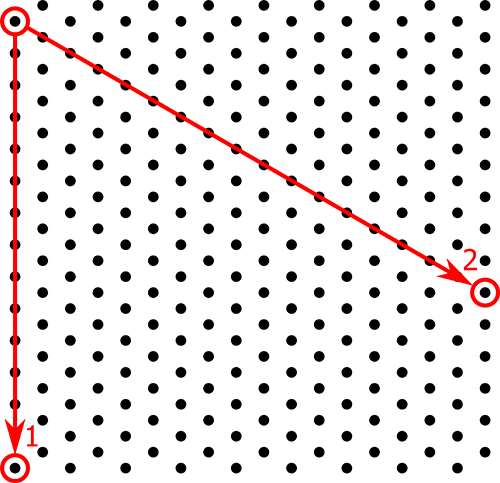

The top left nanowire provides the base point. By selecting two wires further out along the two axes shown a more accurate guess will be created. Choosing wires that seem to fit well on the axes (small deviations) will lead to a better start for the optimization.

When you have chosen two points, the lattice will be optimized over the entire dataset and the result shown for the top left tile.

PS: If you don't see the interactive plot window, it might have appeared underneath your current browser window. Look for it in your taskbar.

In [16]:
%matplotlib
tiles.makeLattice()

Using matplotlib backend: Qt5Agg
Blobs: 106
Lattice optimized for first tile.
Blobs: 218
Lattice optimized for 2 of 4 columns.
Blobs: 500
Lattice optimized for 2 of 3 rows.
Blobs: 1327
Final optimization finished.


Now that we have defined the lattice, let's take a look at how the nanowires are positioned in relation to it, over the entire dataset. When you run the code in the cell below, you will see the nanowires circled in red as before, the lattice points circled in blue, and yellow lines connecting each nanowire to it's nearest lattice point.

If the lattice is completely off, something went wrong during the last step. You might wish to try running it again. Make sure to click nanowires along the specified axes.

Assigned blobs file not found! Assigning.


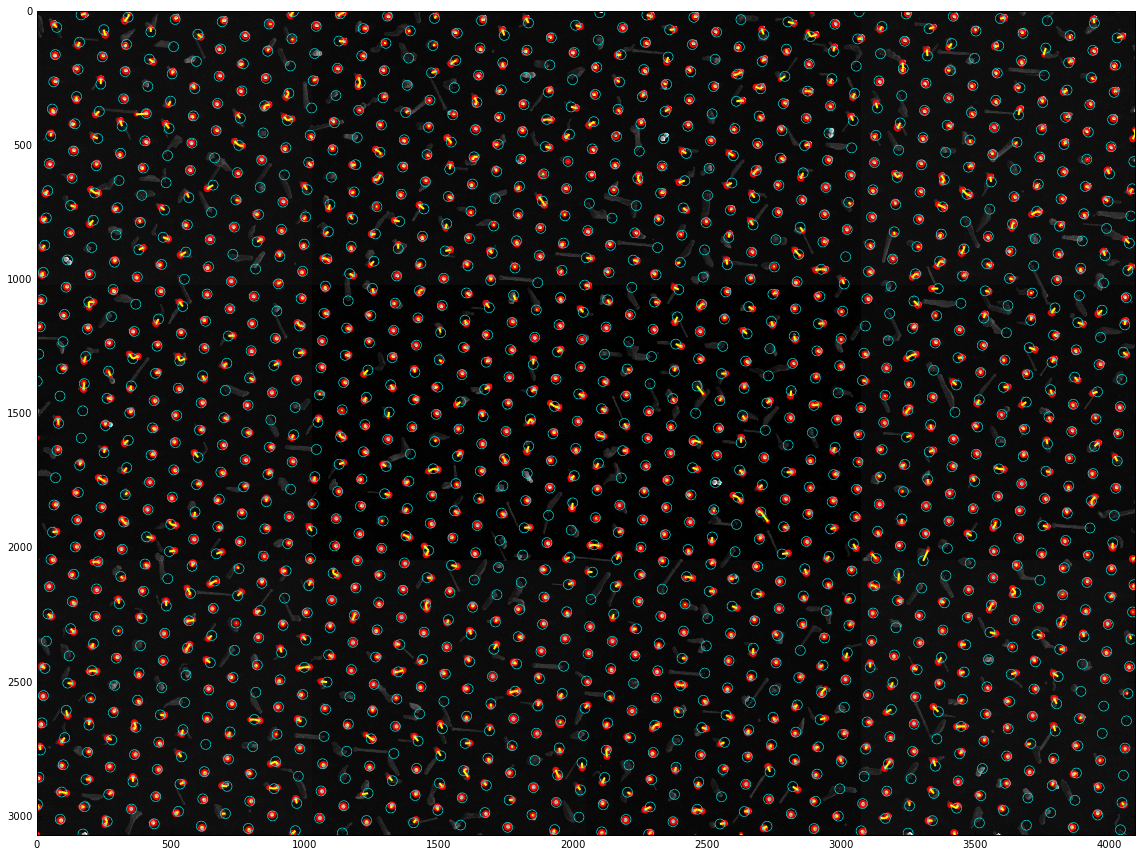

In [17]:
%matplotlib inline
tiles.displayTileRegion(0, 3, 0, 2)

We now know how many lattice points are within our image, and how many nanowires we have detected. This can be used to calculate nanowire growth yield.

In [18]:
print('Yield:', round(tiles.getYield()*100, 2), '%')

Yield: 94.18 %


Note that we count each detected nanowire towards the yield, even when multiple nanowires are growing from the same hole. This gives a somewhat inflated yield number. It is possible to gain accurate yield for one nanowire per hole by only counting nanowires belonging to a lattice point with no other nanowires. This feature has been implemented in other parts of the software, and will likely be availiable here shortly.

We now have a lot of information about the nanowires. We can use it to visualize several different, interesting aspects of our characterization. We can for instance make a plot where each nanowire is represented by a circle colored according to different parameters. The code below creates a plot showing the wires colored by diameter. This lets us spot if for instance larger droplets might be aggregated in certain areas. We can also plot a simple histogram of the nanowire diameter.

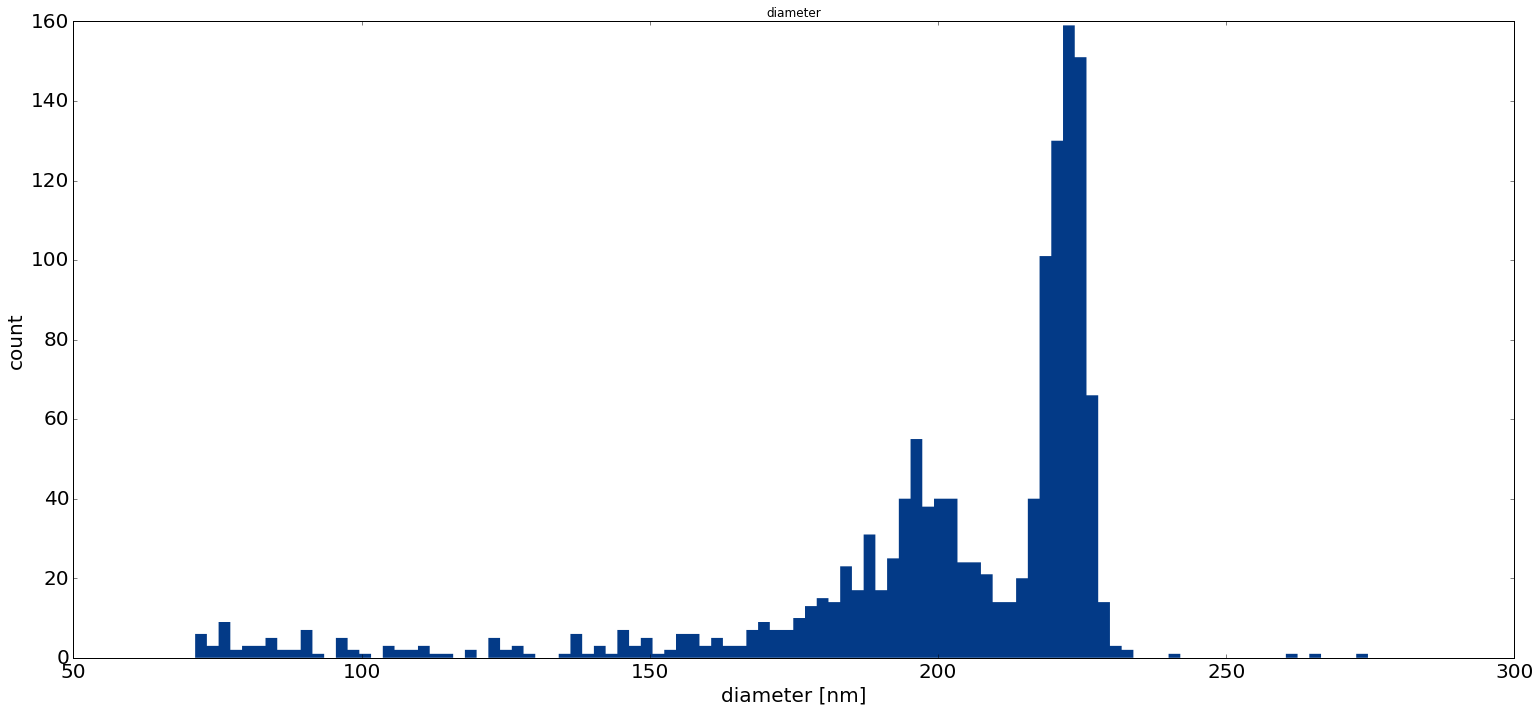

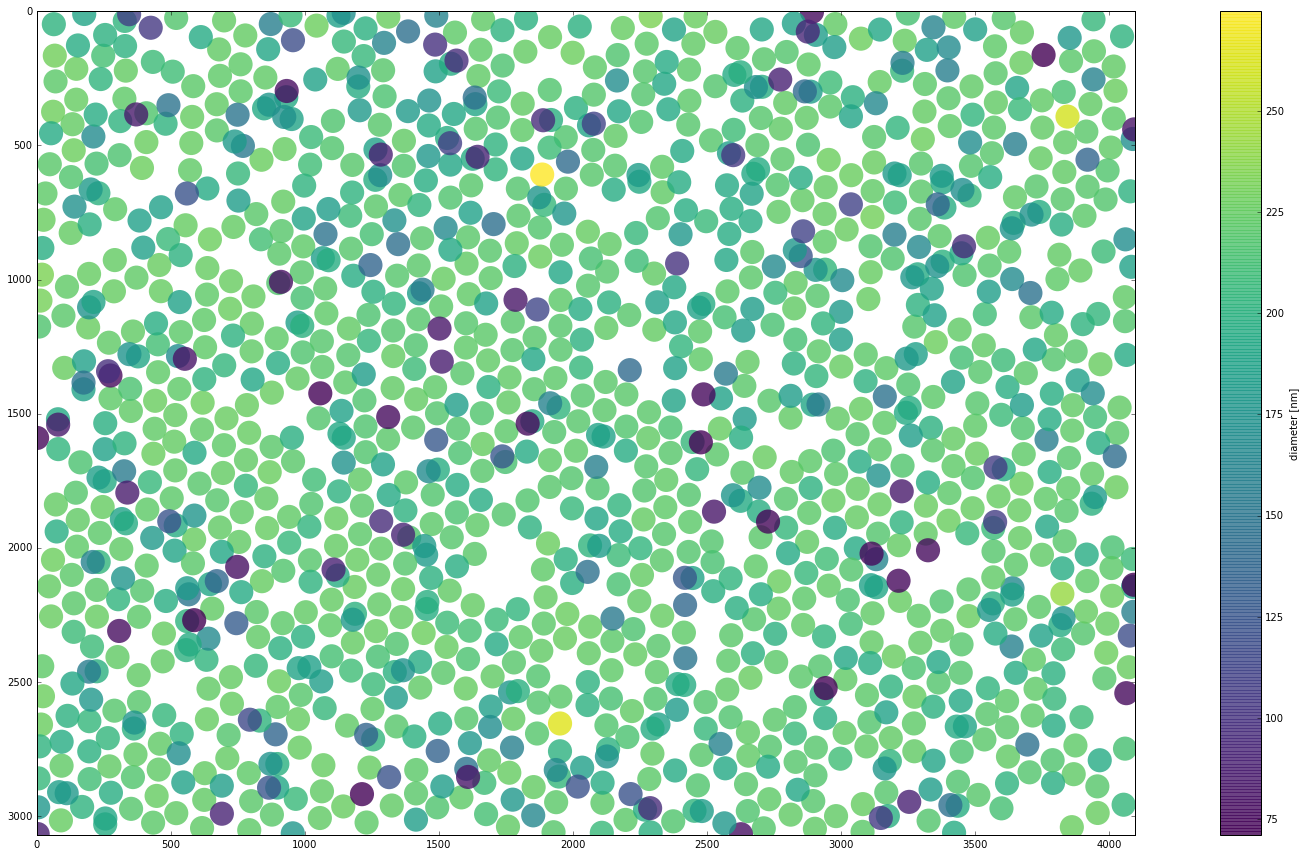

In [19]:
tiles.plotHistogram('diameter', bins=100)
tiles.plotBlobRegion(0, 3, 0, 2, property='radius', colormap='viridis')

We can make the same kinds of plots for displacement from the lattice for each wire:

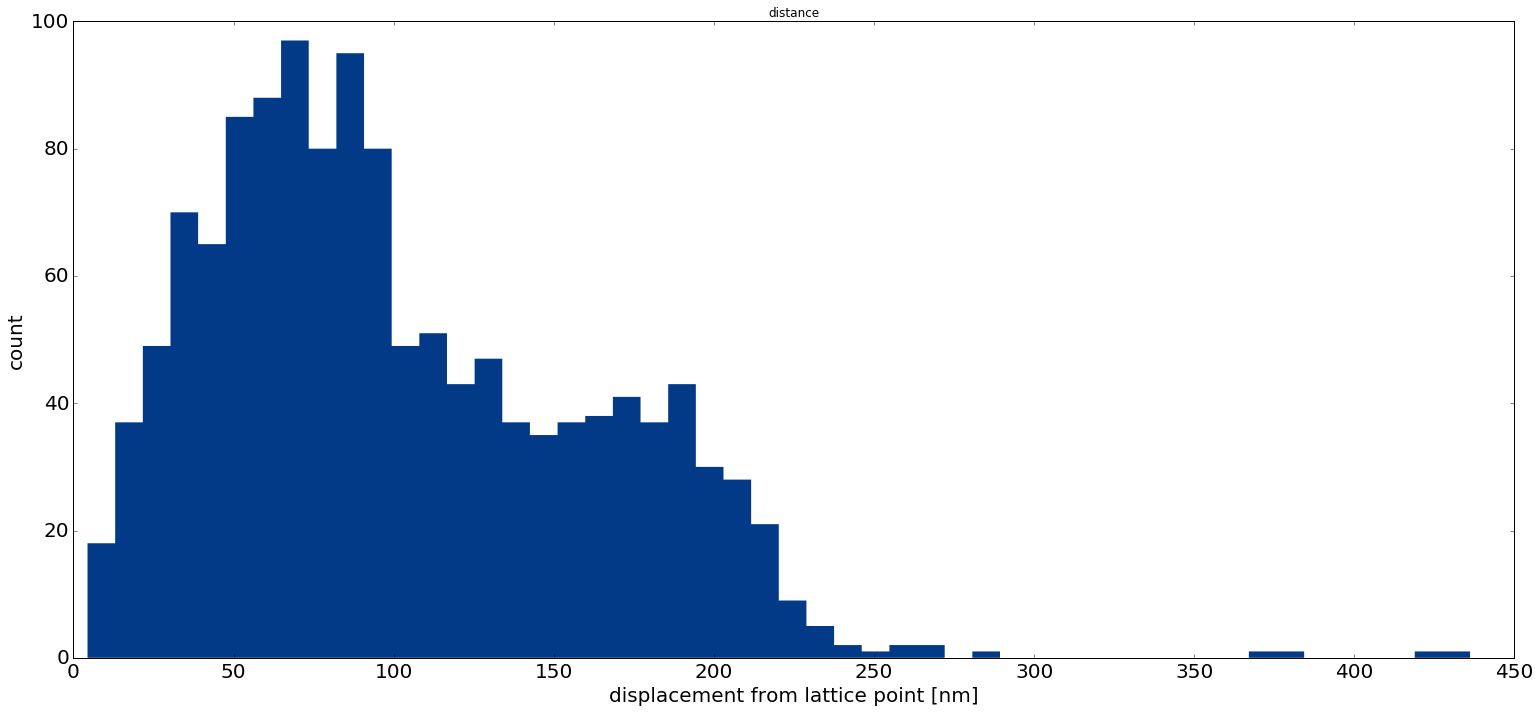

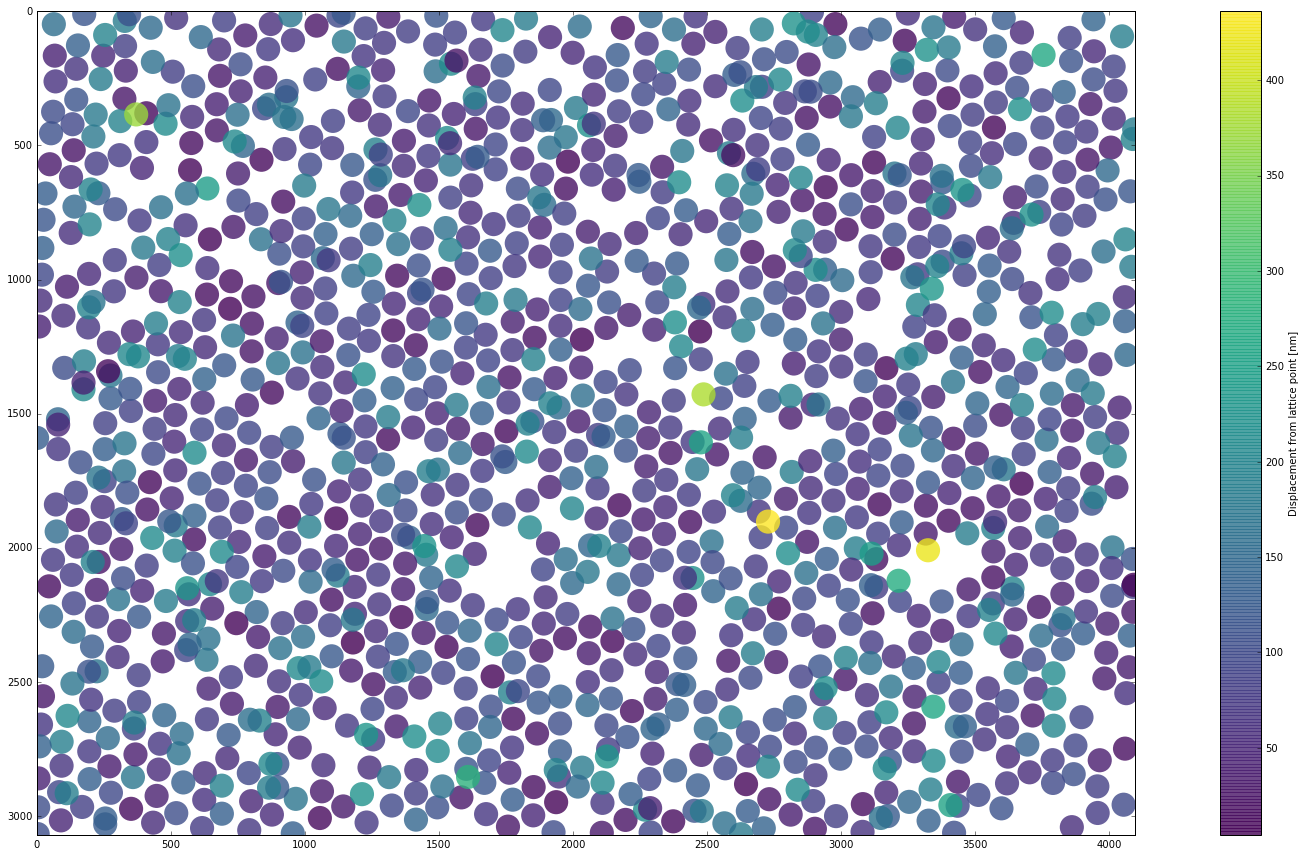

In [20]:
tiles.plotHistogram('distance', bins=50)
tiles.plotBlobRegion(0, 3, 0, 2, property='distance')

And finally for the displacement angle:

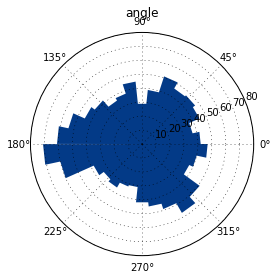

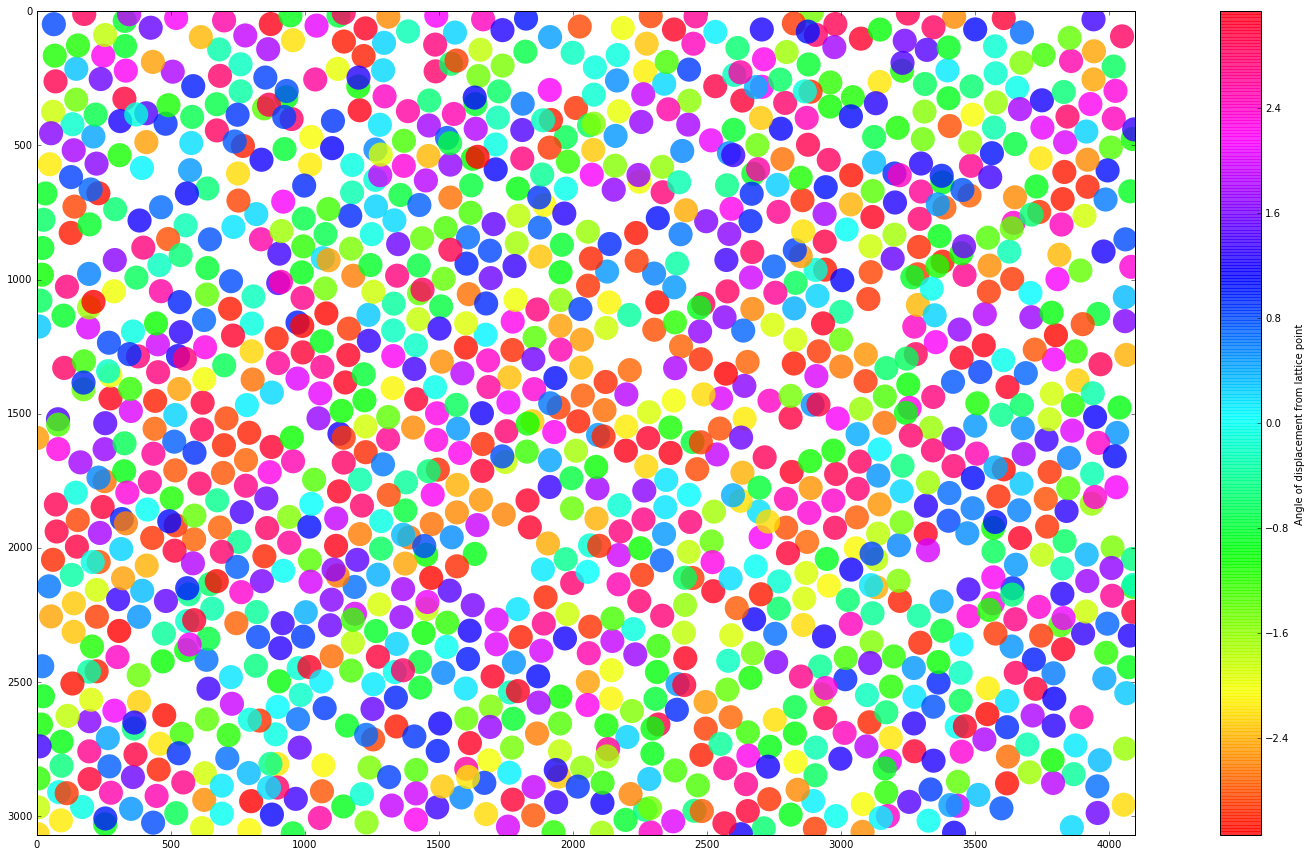

In [21]:
tiles.plotRadialHistogram('angle', bins=30, fontsize = 10)
tiles.plotBlobRegion(0, 3, 0, 2, property='angle')

As you can see the nanowire statistics software gives you an easy way to collect information about large amounts of nanowires, which can give you an easy and objective measure of growth quality.